In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils.simulator import TrajectoryGenerator, Camera, Field
import pandas as pd
import imageio
%load_ext autoreload
%autoreload 2


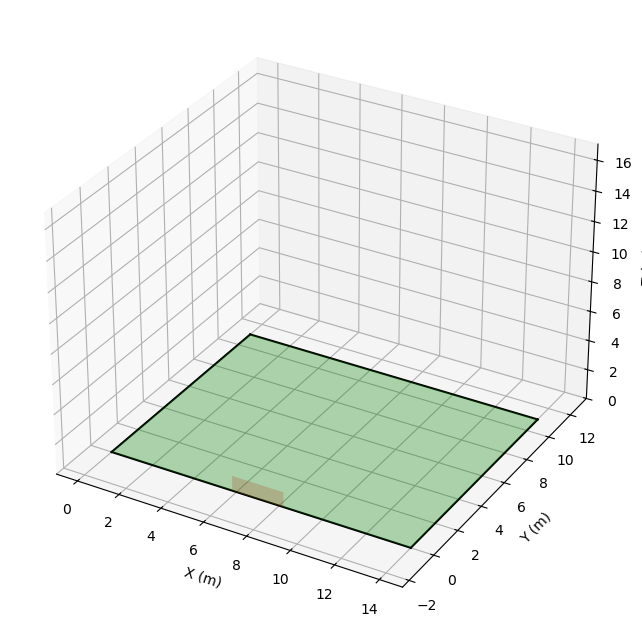

In [20]:
W = 14.0      # field width (m)
L = 11.0       # field length (m)

field = Field(W, L, 2.4, 1)
field.plot()
plt.show()

In [21]:
Vmax = 10    # maximum speed (m/s)
R = 0.11       # radius of the ball (m) (11 - 11.5 cm)
margin = 0
constraints = [
    lambda params: 0 < params["lx"] < params["field"].W,  # Landing X within bounds
    lambda params: params["ly"] < params["field"].L,  # Landing Y within bounds
    lambda params: params["tf"] > 0.3,          # Minimum flight time
    lambda params: 0< params["t_y0"] < 5,          # Maximum time to reach Y0
]

# Constraints so the ball goes through the goal
constraints.extend([
    lambda params: - (params["field"].GW/2 + margin) < params["x_y0"] - params["field"].center[0] < params["field"].GW/2 + margin,  # Ball should go through the goal or near it
    lambda params: params["R"] <= params["z_y0"] < params["field"].GH + margin,  # Ball should go through the goal or near it
])

trajectory_gen = TrajectoryGenerator(constraints, R, field, Vmax)
# r0 = np.array([W/2, L/4, R])
# vs, _, ts = trajectory_gen.get_velocities_roll(r0, plot = True, n = 10)
# fig, ax = field.plot()
# for v0, t_flight in zip(vs, ts):
#     trajectory = trajectory_gen.sample_trajectory(r0, v0, t_flight)
#     trajectory_gen.plot_trajectory(trajectory, ax)

t_stop: 5.8584367347417015
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
0.026466755990938985 -0.3101076310935239 -1.7777777777777777
[15.93273568 -4.21586221]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
y_y0: -8.881784197001252e-16
t_stop: 76.15967755164212
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
-0.024082650694977427 3.668253823036622 -1.7777777777777777
[151.83316452   0.48619058]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
y_y0: -4.2674197509029455e-16
t_stop: 93.73498775586722
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
0.027114211508726258 -5.0831005675609 -1.7777777777777777
[187.81906825  -0.34909274]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
y_y0: 2.2737367544323206e-13
t_stop: 52.72593061267532
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
-0.006220990613419849 0.6560150388505588 -

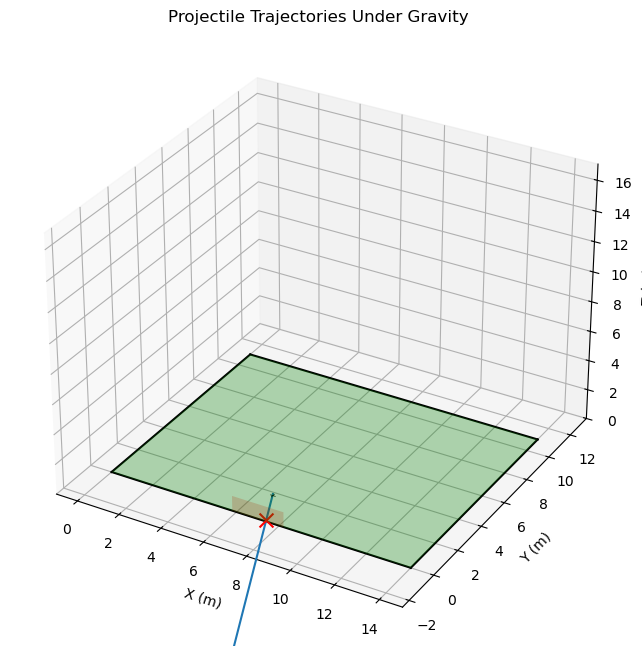

In [67]:
r0s, vs, ls, ts = trajectory_gen.get_init_conditions(1, roll=True)

fig, ax = field.plot()

# Loop through each object and plot its trajectory.
for r0, v0, l, t_flight in zip(r0s, vs, ls, ts):
    trajectory = trajectory_gen.sample_trajectory(r0, v0, t_flight, roll=True, fps=200)
    trajectory_gen.plot_trajectory(trajectory, ax)
    ax.scatter(l[0], l[1], l[2], c='r', s=100, marker='x')
# Set labels and title
ax.set_title('Projectile Trajectories Under Gravity')


plt.show()

In [30]:

fps = 200

# ---------------------
# Define camera parameters for the pinhole model
# ---------------------
camera_pos = np.array([field.center[0], 0, 0.7])          # Camera position in world space
camera_target = np.array([field.center[0], field.center[1], camera_pos[2]])        # Where the camera is looking (center of field) It would be good to transform this into an angle and assume verticality
orientation = Camera.get_orientation(camera_pos, camera_target)
img_width, img_height = 1280, 720               # Image resolution (in pixels)
focal_length = 0.008                             # Focal length in meters

camera = Camera(camera_pos, orientation, focal_length, img_width, img_height, fps = fps)



c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:229: RuntimeWarning: divide by zero encountered in scalar divide
  return -1/self.mu * np.log(1 - self.mu * (s - s0)/v0)


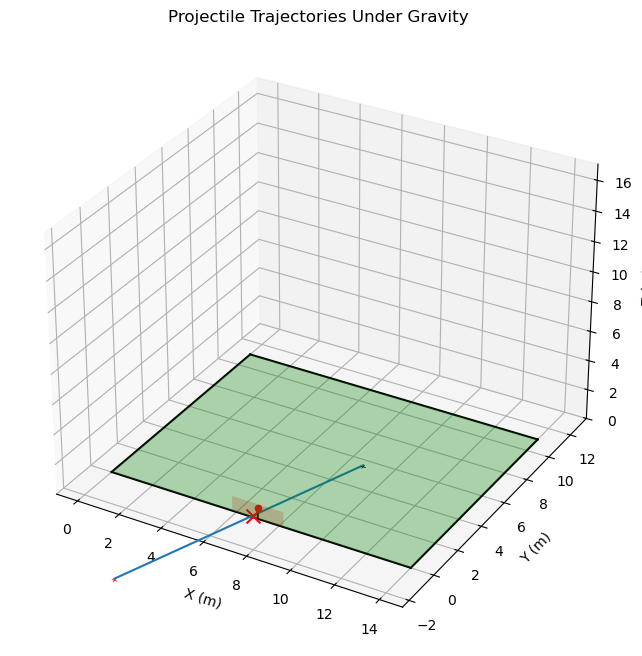

[-3.0414519  -8.43386446  0.        ] 9.712222838595922


In [ ]:
# Plot one trajectory for a given initial position

r0 = np.array([5*W/8, L/2, R])
vs, ls, ts = trajectory_gen.get_velocities_roll(r0, plot = False, n = 1)

fig, ax = field.plot()



c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:68: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2


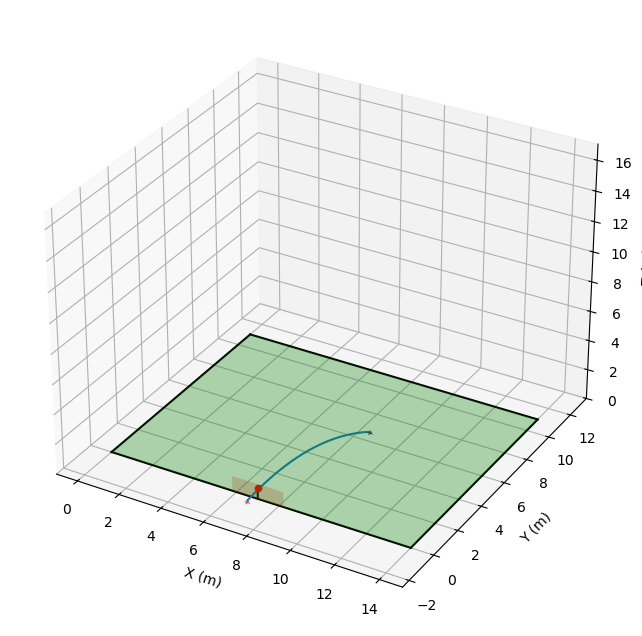

In [7]:
# Get one trajectory (for demonstration, we only use the first one)
is_roll = False
r0s, v0s, ls, ts = trajectory_gen.get_init_conditions(1, is_roll)
# r0 = r0[0]
# v0 = v0[0]
# l = l[0]
# t_flight = ts[0]

fig, ax = field.plot()
for r0, v0, l, t_flight in zip(r0s, v0s, ls, ts):
    trajectory = trajectory_gen.sample_trajectory(r0, v0, t_flight, fps, is_roll)
    trajectory_gen.plot_trajectory(trajectory, ax, camera)
    # ax.scatter(l[0], l[1], l[2], c='r', s=100, marker='x')


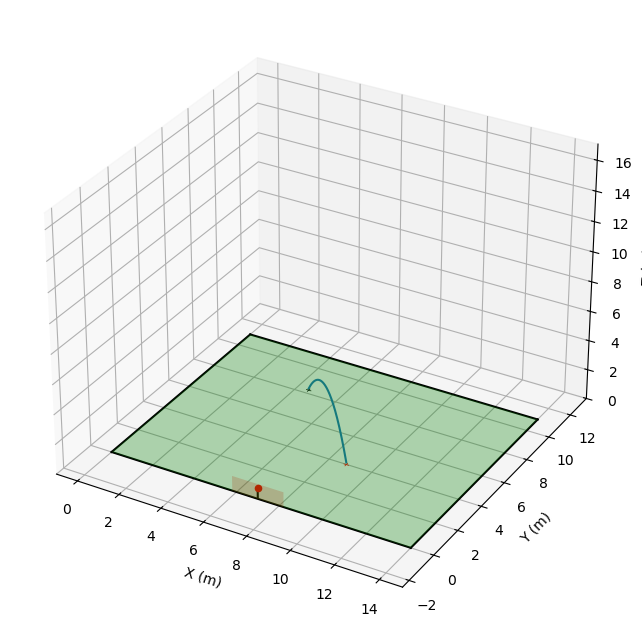

In [7]:
r0 = np.array([1.3*W/4, 3*L/4, R])
v0 = np.array([3, -3, 7])
t_flight = 2 * v0[2] / 9.81
fig, ax = field.plot()
trajectory = trajectory_gen.sample_trajectory(r0, v0, t_flight, fps, False)
trajectory_gen.plot_trajectory(trajectory, ax, camera)

In [29]:
df = pd.DataFrame(trajectory, columns=["x", "y", "z", ])
df.to_csv("trajectory.csv", index=False)

In [35]:
import csv
with open("trajectory.csv", "r") as file:
    reader = csv.reader(file)
    positions = list(reader)
positions[1:5]
for idx, position in enumerate(trajectory):
        x, y, z = position
        print(f"Position {idx}: x={x}, y={y}, z={z}")

Position 0: x=4.55, y=8.25, z=0.11
Position 1: x=4.5650222651429795, y=8.23497773485702, z=0.14492896269502198
Position 2: x=4.580044530285959, y=8.21995546971404, z=0.1796119467795156
Position 3: x=4.595066795428939, y=8.204933204571061, z=0.21404895225348095
Position 4: x=4.6100890605719185, y=8.189910939428081, z=0.24823997911691797
Position 5: x=4.625111325714899, y=8.174888674285102, z=0.2821850273698266
Position 6: x=4.640133590857879, y=8.159866409142122, z=0.315884097012207
Position 7: x=4.655155856000858, y=8.144844143999142, z=0.34933718804405905
Position 8: x=4.670178121143838, y=8.129821878856163, z=0.38254430046538274
Position 9: x=4.685200386286818, y=8.114799613713181, z=0.4155054342761781
Position 10: x=4.700222651429797, y=8.099777348570202, z=0.44822058947644516
Position 11: x=4.715244916572777, y=8.084755083427222, z=0.4806897660661839
Position 12: x=4.730267181715757, y=8.069732818284242, z=0.5129129640453943
Position 13: x=4.745289446858737, y=8.054710553141263, z=

In [15]:
# Create frames from the trajectory
frames = camera.create_frames(trajectory, R, save_frames=True)

# Create a video from the frames
camera.create_video(frames, fps)

Frames saved in directory: frames
Video saved as trajectory.avi


In [ ]:
# Here I tested the camera with different targets

camera_pos = np.array([field.center[0], 0, 0.7])          # Camera position in world space
camera_target1 = np.array([field.center[0], field.center[1], 0])
camera_target2 = np.array([field.center[0], field.center[1], 2*camera_pos[2]])
camera_target3 = np.array([field.center[0], field.center[1], camera_pos[2]])
camera_target4 = np.array([field.center[0] + 1, field.center[1], camera_pos[2]])
camera_target5 = np.array([field.center[0] - 1, field.center[1], camera_pos[2]])

orientation1 = Camera.get_orientation(camera_pos, camera_target1)
orientation2 = Camera.get_orientation(camera_pos, camera_target2)
orientation3 = Camera.get_orientation(camera_pos, camera_target3)
orientation4 = Camera.get_orientation(camera_pos, camera_target4)
orientation5 = Camera.get_orientation(camera_pos, camera_target5)

camera1 = Camera(camera_pos, orientation1, focal_length, img_width, img_height, fps)
camera2 = Camera(camera_pos, orientation2, focal_length, img_width, img_height, fps)
camera3 = Camera(camera_pos, orientation3, focal_length, img_width, img_height, fps)
camera4 = Camera(camera_pos, orientation4, focal_length, img_width, img_height, fps)
camera5 = Camera(camera_pos, orientation5, focal_length, img_width, img_height, fps)

frames1 = camera1.create_frames(trajectory, trajectory_gen.R, False)
frames2 = camera2.create_frames(trajectory, trajectory_gen.R, False)
frames3 = camera3.create_frames(trajectory, trajectory_gen.R, False)
frames4 = camera4.create_frames(trajectory, trajectory_gen.R, False)
frames5 = camera5.create_frames(trajectory, trajectory_gen.R, False)

camera1.create_video(frames1, fps, 'camera1.mp4')
camera2.create_video(frames2, fps, 'camera2.mp4')
camera3.create_video(frames3, fps, 'camera3.mp4')
camera4.create_video(frames4, fps, 'camera4.mp4')
camera5.create_video(frames5, fps, 'camera5.mp4')

[ 6.07423534e-17  9.91997912e-01 -1.26254280e-01]
[ 1.000000e+00 -6.123234e-17  0.000000e+00]
[7.73084497e-18 1.26254280e-01 9.91997912e-01]
[[ 1.00000000e+00  6.07423534e-17  7.73084497e-18]
 [-6.12323400e-17  9.91997912e-01  1.26254280e-01]
 [ 0.00000000e+00 -1.26254280e-01  9.91997912e-01]]
[6.07423534e-17 9.91997912e-01 1.26254280e-01]
[ 1.000000e+00 -6.123234e-17  0.000000e+00]
[-7.73084497e-18 -1.26254280e-01  9.91997912e-01]
[[ 1.00000000e+00  6.07423534e-17 -7.73084497e-18]
 [-6.12323400e-17  9.91997912e-01 -1.26254280e-01]
 [ 0.00000000e+00  1.26254280e-01  9.91997912e-01]]
[6.123234e-17 1.000000e+00 0.000000e+00]
[ 1.000000e+00 -6.123234e-17  0.000000e+00]
[-0.  0.  1.]
[[ 1.000000e+00  6.123234e-17 -0.000000e+00]
 [-6.123234e-17  1.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
[0.17888544 0.98386991 0.        ]
[ 0.98386991 -0.17888544  0.        ]
[-0.  0.  1.]
[[ 0.98386991  0.17888544 -0.        ]
 [-0.17888544  0.98386991  0.        ]
 [ 0.     

# Trajectories in the Camera's Field of View

In [12]:
W = 14.0      # field width (m)
L = 11.0       # field length (m)

field = Field(W, L, 2.4, 1)


Vmax = 10    # maximum speed (m/s)
R = 0.11       # radius of the ball (m) (11 - 11.5 cm)
margin = 0
constraints = [
    lambda params: 0 < params["lx"] < params["field"].W,  # Landing X within bounds
    lambda params: params["ly"] < params["field"].L,  # Landing Y within bounds
    lambda params: params["tf"] > 0.3,          # Minimum flight time
    lambda params: 0< params["t_y0"] < 5,          # Maximum time to reach Y0
]

# Constraints so the ball goes through the goal
constraints.extend([
    lambda params: - (params["field"].GW/2 + margin) < params["x_y0"] - params["field"].center[0] < params["field"].GW/2 + margin,  # Ball should go through the goal or near it
    lambda params: params["R"] <= params["z_y0"] < params["field"].GH/2 + margin,  # Ball should go through the goal or near it
])

In [ ]:
fps = 200

# ---------------------
# Define camera parameters for the pinhole model
# ---------------------
camera_pos = np.array([field.center[0], 0, 0.7])          # Camera position in world space
camera_target = np.array([field.center[0], field.center[1], camera_pos[2]])        # Where the camera is looking (center of field) It would be good to transform this into an angle and assume verticality
orientation = Camera.get_orientation(camera_pos, camera_target)
img_width, img_height = 1280, 720               # Image resolution (in pixels)
focal_length = 0.008                             # Focal length in meters

camera = Camera(camera_pos, orientation, focal_length, img_width, img_height, fps)

In [20]:
trajectory_gen_camera = TrajectoryGenerator(constraints, R, field, Vmax, camera)

Camera coordinates: [-2.61616162  6.66666667 -0.59        1.        ], Projected coordinates: (-0.0031393939393939392, -0.0007080000000000001)
Camera coordinates: [-2.61616162  6.66666667 -0.59        1.        ], Projected coordinates: (-0.0031393939393939392, -0.0007080000000000001)
((319, 240), np.float64(6.666666666666666))


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:229: RuntimeWarning: invalid value encountered in log
  return -1/self.mu * np.log(1 - self.mu * (s - s0)/v0)


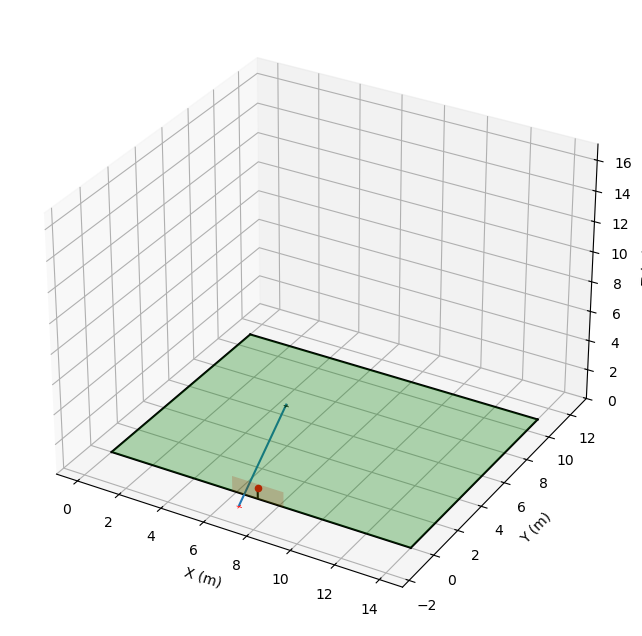

In [15]:
is_roll = True
r0s, v0s, ls, ts = trajectory_gen_camera.get_init_conditions(1, is_roll)

fig, ax = field.plot()
for r0, v0, l, t_flight in zip(r0s, v0s, ls, ts):
    trajectory = trajectory_gen_camera.sample_trajectory(r0, v0, t_flight, fps, is_roll)
    trajectory_gen_camera.plot_trajectory(trajectory, ax, camera)
    # ax.scatter(l[0], l[1], l[2], c='r', s=100, marker='x')

In [100]:
all_init_conditions

r0_x      r0_y  r0_z      v0_x      v0_y      v0_z       g_x       g_y  \
0  5.373737  9.888889  0.11  0.548709 -6.855320  7.259718  6.165257  0.375698   
1  4.383838  8.222222  0.11  1.150068 -6.099419  0.000000  5.934169  0.110000   
2  9.474747  8.777778  0.11 -1.718573 -7.034492  0.000000  7.330279  0.110000   
3  6.787879  7.666667  0.11 -0.144468 -5.425007  7.136451  6.583716  0.399231   
4  5.656566  4.777778  0.11  0.399465 -4.990741  4.742928  6.038985  0.155216   

  g_x_bin g_y_bin        tf is_roll  
0       1       1  1.480065   False  
1       1       1  9.186902    True  
2       4       1  9.407117    True  
3       2       1  1.454934   False  
4       1       1  0.966958   False

Camera coordinates: [-3.18181818  9.33333333 -0.59        1.        ], Projected coordinates: (-1.3636363636363643e-05, -2.528571428571429e-06)
Camera coordinates: [-3.18181818  9.33333333 -0.59        1.        ], Projected coordinates: (-1.3636363636363643e-05, -2.528571428571429e-06)
((319, 240), np.float64(9.333333333333332))
Camera coordinates: [-4.45454545  0.66666667 -0.59        1.        ], Projected coordinates: (-0.0002672727272727275, -3.540000000000002e-05)
Camera coordinates: [-4.45454545  0.66666667 -0.59        1.        ], Projected coordinates: (-0.0002672727272727275, -3.540000000000002e-05)
((319, 240), np.float64(0.6666666666666663))


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:68: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:383: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  if cont > 10000:


Camera coordinates: [ 4.45454545  5.55555556 -0.59        1.        ], Projected coordinates: (3.2072727272727264e-05, -4.247999999999999e-06)
Camera coordinates: [ 4.45454545  5.55555556 -0.59        1.        ], Projected coordinates: (3.2072727272727264e-05, -4.247999999999999e-06)
((320, 240), np.float64(5.555555555555556))
Camera coordinates: [ 4.17171717  7.33333333 -0.59        1.        ], Projected coordinates: (2.275482093663912e-05, -3.218181818181818e-06)
Camera coordinates: [ 4.17171717  7.33333333 -0.59        1.        ], Projected coordinates: (2.275482093663912e-05, -3.218181818181818e-06)
((320, 240), np.float64(7.333333333333334))
Camera coordinates: [-0.49494949 10.88888889 -0.59        1.        ], Projected coordinates: (-1.8181818181818215e-06, -2.1673469387755105e-06)
Camera coordinates: [-0.49494949 10.88888889 -0.59        1.        ], Projected coordinates: (-1.8181818181818215e-06, -2.1673469387755105e-06)
((319, 240), np.float64(10.888888888888888))


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:229: RuntimeWarning: invalid value encountered in log
  return -1/self.mu * np.log(1 - self.mu * (s - s0)/v0)
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:229: RuntimeWarning: divide by zero encountered in scalar divide
  return -1/self.mu * np.log(1 - self.mu * (s - s0)/v0)
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:156: RuntimeWarning: divide by zero encountered in log
  t_stop = 1/self.mu * np.log(np.sqrt(v0_x**2 + v0_y**2)/threshold)


Camera coordinates: [-2.19191919  9.55555556 -0.59        1.        ], Projected coordinates: (-9.175475687103598e-06, -2.469767441860465e-06)
Camera coordinates: [-2.19191919  9.55555556 -0.59        1.        ], Projected coordinates: (-9.175475687103598e-06, -2.469767441860465e-06)
((319, 240), np.float64(9.555555555555555))
Camera coordinates: [ 6.57575758  1.         -0.59        1.        ], Projected coordinates: (0.00026303030303030287, -2.359999999999999e-05)
Camera coordinates: [ 6.57575758  1.         -0.59        1.        ], Projected coordinates: (0.00026303030303030287, -2.359999999999999e-05)
((320, 240), np.float64(1.0000000000000004))


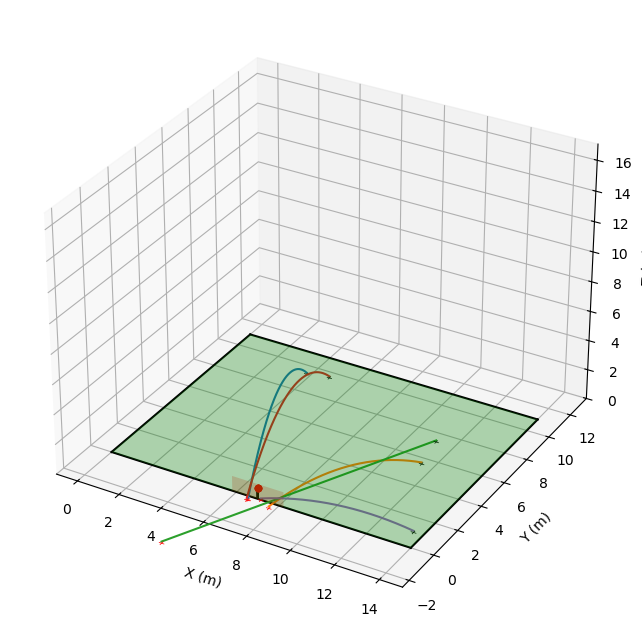

In [ ]:
n_goal_bins_x = 6
n_goal_bins_y = 1
all_init_conditions = trajectory_gen_camera.generate_df_init_conditions(5, 1, n_goal_bins_x, n_goal_bins_y)


In [51]:

def plot_trajectories_df_init(df, trajectory_gen): 
    fig, ax = trajectory_gen.field.plot()
    for _, init_conditions in df.iterrows():
        r0 = np.zeros(3)
        v0 = np.zeros(3)
        g_bins = np.zeros(2)
        _, r0[0], r0[1], r0[2], v0[0], v0[1], v0[2], g_x, g_y, g_bins[0], g_bins[1], t_flight, is_roll, t_goal, _, _ = init_conditions
        print(is_roll)
        trajectory = trajectory_gen.sample_trajectory(r0, v0, t_flight, fps, is_roll)
        trajectory_gen.plot_trajectory(trajectory, ax, trajectory_gen.camera)
        ax.scatter(g_x, 0, g_y, c='r', s=100, marker='x')

def plot_trajectories_df_pos(df, trajectory_gen):
    fig, ax = trajectory_gen.field.plot()
    trs = df['tr'].unique()
    for tr in trs:
        df_tr = df[df['tr'] == tr]
        x = df_tr['x'].values
        y = df_tr['y'].values
        z = df_tr['z'].values
        ax.plot(x, y, z, label=f'Trajectory {tr}')

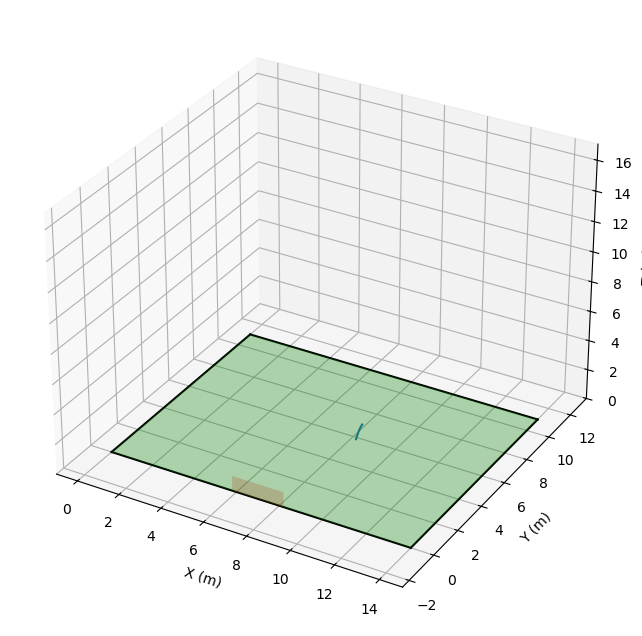

In [165]:
plot_trajectories_df_pos(df, trajectory_gen_goes_out)

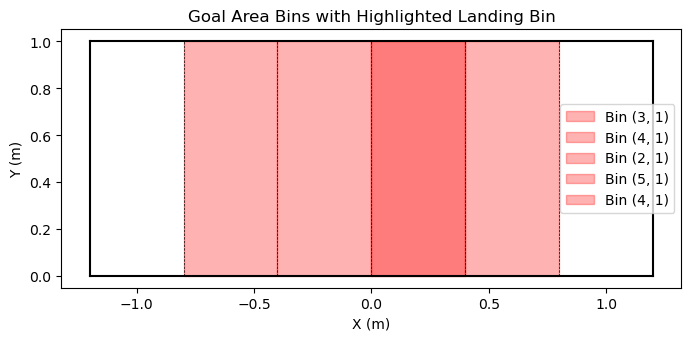

In [95]:

g_x_grid = np.linspace(0, field.GW, n_goal_bins_x + 1)
g_y_grid = np.linspace(0, field.GH, n_goal_bins_y + 1)


GW = field.GW
GH = field.GH

fig, ax = plt.subplots(figsize=(8, 6))

# Draw the outer boundaries of the goal area:
ax.plot([-GW/2, GW/2], [0, 0], 'k-')       # bottom edge
ax.plot([-GW/2, GW/2], [GH, GH], 'k-')       # top edge
ax.plot([-GW/2, -GW/2], [0, GH], 'k-')       # left edge
ax.plot([GW/2, GW/2], [0, GH], 'k-')         # right edge

# Draw vertical grid lines:
for x in g_x_grid:
    x_line = x - GW/2  # shift so that grid runs from -GW/2 to GW/2
    ax.plot([x_line, x_line], [0, GH], 'k--', lw=0.5)

# Draw horizontal grid lines:
for y in g_y_grid:
    ax.plot([-GW/2, GW/2], [y, y], 'k--', lw=0.5)

# Determine the boundaries of the selected bin.
# Note: np.digitize returns an index starting at 1.
for _, init_conditions in all_init_conditions.iterrows():
    _, _, _, _, _, _, g_x_bin, g_y_bin, _, _ = init_conditions
    x_min = g_x_grid[g_x_bin - 1] - GW/2
    x_max = g_x_grid[g_x_bin] - GW/2
    y_min = g_y_grid[g_y_bin - 1]
    y_max = g_y_grid[g_y_bin]

    # Fill the selected bin with a different color.
    ax.fill([x_min, x_max, x_max, x_min],
            [y_min, y_min, y_max, y_max],
            color='red', alpha=0.3, label=f'Bin ({g_x_bin}, {g_y_bin})')

# # Also, plot the point itself.
# g_x_centered = g_x - field.W/2
# ax.plot(g_x_centered, g_y, 'bo', label='Ball Landing Point')


# Labels and formatting.
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Goal Area Bins with Highlighted Landing Bin')
ax.legend()
ax.set_aspect('equal', 'box')
plt.show()

In [64]:
def plot_goal(g_x_grid, g_y_grid):
    GW = field.GW
    GH = field.GH

    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw the outer boundaries of the goal area:
    ax.plot([-GW/2, GW/2], [0, 0], 'k-')       # bottom edge
    ax.plot([-GW/2, GW/2], [GH, GH], 'k-')       # top edge
    ax.plot([-GW/2, -GW/2], [0, GH], 'k-')       # left edge
    ax.plot([GW/2, GW/2], [0, GH], 'k-')         # right edge

    # Draw vertical grid lines:
    for x in g_x_grid:
        x_line = x - GW/2  # shift so that grid runs from -GW/2 to GW/2
        ax.plot([x_line, x_line], [0, GH], 'k--', lw=0.5)

    # Draw horizontal grid lines:
    for y in g_y_grid:
        ax.plot([-GW/2, GW/2], [y, y], 'k--', lw=0.5)
    
    return fig, ax

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:68: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2


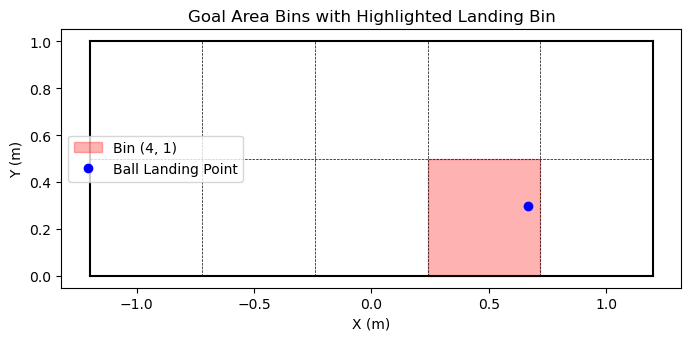

In [165]:
init_conditions = trajectory_gen_camera.get_init_conditions(1, False)
r0, v0, g, t_flight = init_conditions
g_x, _, g_y = g[0]

n_goal_bins_x = 5
n_goal_bins_y = 2
g_x_grid = np.linspace(0, field.GW, n_goal_bins_x + 1)
g_y_grid = np.linspace(0, field.GH, n_goal_bins_y + 1)
g_x_from_goal = g_x - field.W/2 + field.GW/2

g_x_bin = np.digitize(g_x_from_goal, g_x_grid)
g_y_bin = np.digitize(g_y, g_y_grid)

GW = field.GW
GH = field.GH

fig, ax = plot_goal(g_x_grid, g_y_grid)

# Determine the boundaries of the selected bin.
# Note: np.digitize returns an index starting at 1.
x_min = g_x_grid[g_x_bin - 1] - GW/2
x_max = g_x_grid[g_x_bin] - GW/2
y_min = g_y_grid[g_y_bin - 1]
y_max = g_y_grid[g_y_bin]

# Fill the selected bin with a different color.
ax.fill([x_min, x_max, x_max, x_min],
        [y_min, y_min, y_max, y_max],
        color='red', alpha=0.3, label=f'Bin ({g_x_bin}, {g_y_bin})')

# Also, plot the point itself.
g_x_centered = g_x - field.W/2
ax.plot(g_x_centered, g_y, 'bo', label='Ball Landing Point')


# Labels and formatting.
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Goal Area Bins with Highlighted Landing Bin')
ax.legend()
ax.set_aspect('equal', 'box')
plt.show()

## Plot Distributions from the Dataset

In [22]:
def plot_r_distribution(df, field):
    fig, ax = field.plot()
    for _, row in df.iterrows():
        r0 = row[['r0_x', 'r0_y', 'r0_z']].values
        ax.scatter(r0[0], r0[1], c='r', s=20, marker='x')

def plot_v_distribution(df):
    v0_abs = []
    for _, row in df.iterrows():
        v0 = row[['v0_x', 'v0_y', 'v0_z']].values
        v0_abs.append(np.linalg.norm(v0))
    plt.figure(figsize=(8, 6))
    plt.hist(v0_abs, bins=5, alpha=0.5)
    plt.xlabel('Initial Speed (m/s)')
    plt.ylabel('Frequency')
    plt.title('Initial Speed Distribution')

def plot_t_flight_distribution(df):
    ts = []
    for _, row in df.iterrows():
        ts.append(row['tf'])
    plt.figure(figsize=(8, 6))
    plt.hist(ts, bins=5, alpha=0.5)
    plt.xlabel('Max Time (s)')
    plt.ylabel('Frequency')
    plt.title('Max Time Distribution')


def plot_goal_bins_distribution(df, gen, ax = None):

    field = gen.field
    g_x_grid = gen.g_x_grid
    g_y_grid = gen.g_y_grid
    if ax is None:
        fig, ax = field.plot_goal(g_x_grid, g_y_grid)

    for _, row in df.iterrows():
        g_x_bin = row['g_x_bin']
        g_y_bin = row['g_y_bin']
        x_min = g_x_grid[g_x_bin - 1] - field.GW/2
        x_max = g_x_grid[g_x_bin] - field.GW/2
        y_min = g_y_grid[g_y_bin - 1]
        y_max = g_y_grid[g_y_bin]

        ax.fill([x_min, x_max, x_max, x_min],
                [y_min, y_min, y_max, y_max],
                color='red', alpha=1/len(df), label=f'Bin ({g_x_bin}, {g_y_bin})')
        
    ax.set_title('Goal Area Bins with Highlighted Landing Bin')
    return ax

def plot_goal_hits_distribution(df, gen, ax = None):
    g_x_grid = gen.g_x_grid
    g_y_grid = gen.g_y_grid
    if g_x_grid is None or g_y_grid is None:
        raise ValueError("Use the same generator you used to generate the df")
    if ax is None:
        fig, ax = plot_goal(g_x_grid, g_y_grid)

    for _, row in df.iterrows():
        g_x = row['g_x']
        g_y = row['g_y']
        g_x_centered = g_x - field.W/2
        ax.scatter(g_x_centered, g_y, c='b', s=20, marker='x')
    return ax

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:429: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:71: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:71: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:71: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_

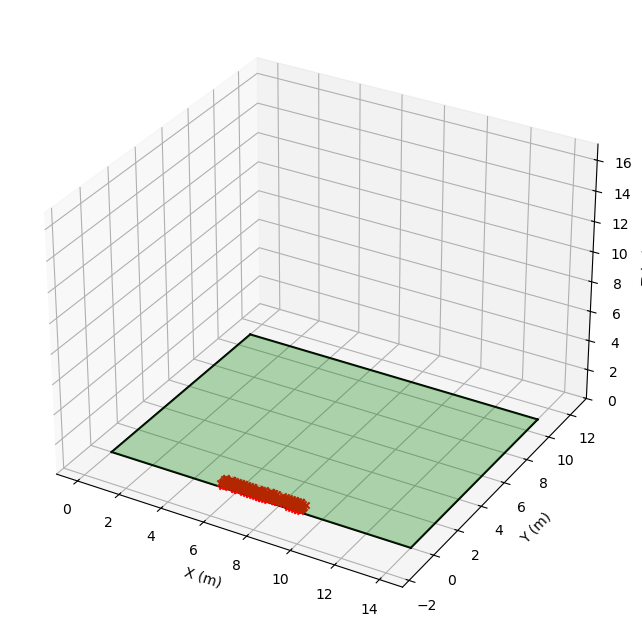

In [26]:
df = trajectory_gen.generate_df_init_conditions(200, 1, n_goal_bins_x, n_goal_bins_y)
plot_r_distribution(df, field)

In [17]:
all_init_conditions = trajectory_gen_camera.generate_df_init_conditions(100, 1, n_goal_bins_x, n_goal_bins_y)

Camera coordinates: [-5.3030303   9.33333333 -0.59        1.        ], Projected coordinates: (-0.004545454545454547, -0.0005057142857142858)
Camera coordinates: [-5.3030303   9.33333333 -0.59        1.        ], Projected coordinates: (-0.004545454545454547, -0.0005057142857142858)
((319, 240), np.float64(9.333333333333332))
Camera coordinates: [ 6.29292929  1.55555556 -0.59        1.        ], Projected coordinates: (0.03236363636363635, -0.0030342857142857138)
Camera coordinates: [ 6.29292929  1.55555556 -0.59        1.        ], Projected coordinates: (0.03236363636363635, -0.0030342857142857138)
((320, 240), np.float64(1.5555555555555558))
Camera coordinates: [-3.04040404  6.11111111 -0.59        1.        ], Projected coordinates: (-0.0039801652892562, -0.0007723636363636364)
Camera coordinates: [-3.04040404  6.11111111 -0.59        1.        ], Projected coordinates: (-0.0039801652892562, -0.0007723636363636364)
((319, 240), np.float64(6.111111111111111))
Camera coordinates: [-6

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:229: RuntimeWarning: invalid value encountered in log
  return -1/self.mu * np.log(1 - self.mu * (s - s0)/v0)
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:229: RuntimeWarning: divide by zero encountered in scalar divide
  return -1/self.mu * np.log(1 - self.mu * (s - s0)/v0)
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:156: RuntimeWarning: divide by zero encountered in log
  t_stop = 1/self.mu * np.log(np.sqrt(v0_x**2 + v0_y**2)/threshold)
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:383: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before t

Camera coordinates: [ 5.16161616  2.66666667 -0.59        1.        ], Projected coordinates: (0.015484848484848482, -0.0017699999999999999)
Camera coordinates: [ 5.16161616  2.66666667 -0.59        1.        ], Projected coordinates: (0.015484848484848482, -0.0017699999999999999)
((320, 240), np.float64(2.666666666666667))
Camera coordinates: [ 1.34343434  5.11111111 -0.59        1.        ], Projected coordinates: (0.002102766798418971, -0.0009234782608695651)
Camera coordinates: [ 1.34343434  5.11111111 -0.59        1.        ], Projected coordinates: (0.002102766798418971, -0.0009234782608695651)
((320, 240), np.float64(5.111111111111112))
Camera coordinates: [ 3.46464646  9.33333333 -0.59        1.        ], Projected coordinates: (0.0029696969696969694, -0.0005057142857142858)
Camera coordinates: [ 3.46464646  9.33333333 -0.59        1.        ], Projected coordinates: (0.0029696969696969694, -0.0005057142857142858)
((320, 240), np.float64(9.333333333333332))
Camera coordinates: 

<Axes: title={'center': 'Goal Area Bins with Highlighted Landing Bin'}>

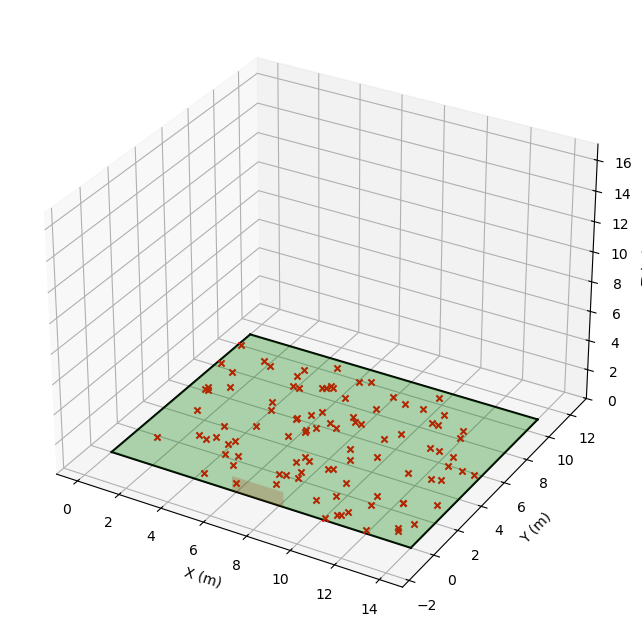

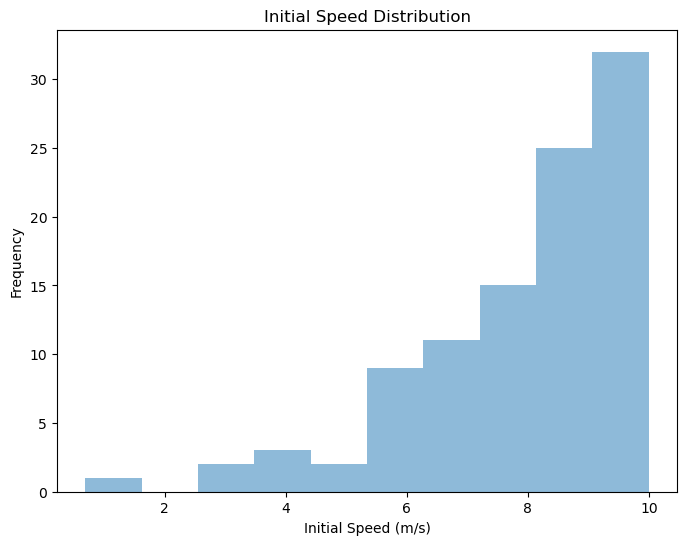

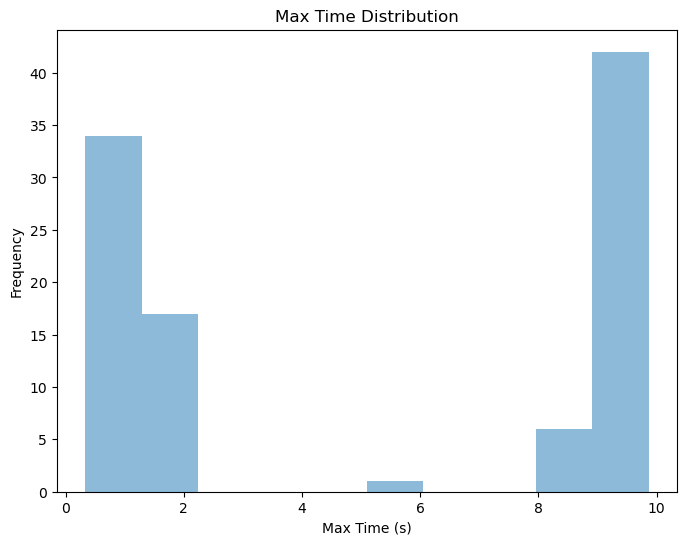

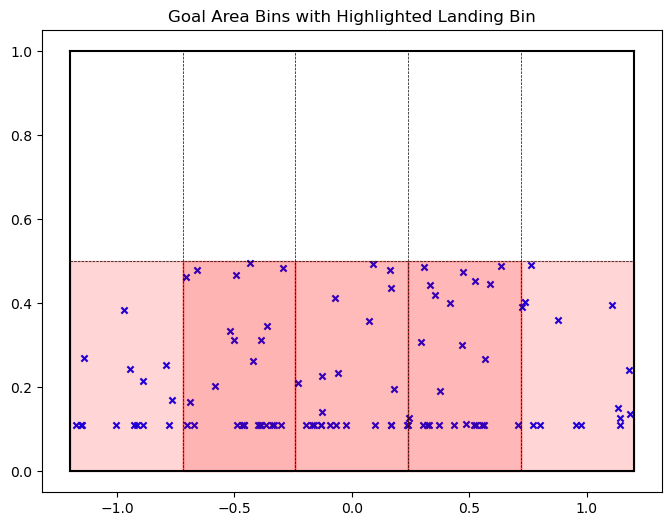

In [18]:
trajectory_gen_camera.plot_r_distribution(all_init_conditions)
trajectory_gen_camera.plot_v_distribution(all_init_conditions)
trajectory_gen_camera.plot_t_flight_distribution(all_init_conditions)
ax = trajectory_gen_camera.plot_goal_hits_distribution(all_init_conditions)
trajectory_gen_camera.plot_goal_bins_distribution(all_init_conditions, ax)

In [22]:
s0 = np.array([0,0,0])
v0 = np.array([0,0,5])
t = 1
s = trajectory_gen_camera.s_of_t_throw(s0, v0, t)
print(s)
trajectory_gen_camera.t_of_s_throw(s0, v0, s, False)

[0.    0.    0.095]


1.0

In [ ]:

g_x_grid = np.linspace(0, field.GW, n_goal_bins_x + 1)
g_y_grid = np.linspace(0, field.GH, n_goal_bins_y + 1)
g_x_bin = np.digitize(g_x, g_x_grid)
g_y_bin = np.digitize(g_y, g_y_grid)
g_x_bin, g_y_bin

(2, 1)

In [24]:
g_x_grid, g_y_grid

(array([0.  , 0.48, 0.96, 1.44, 1.92, 2.4 ]), array([0. , 0.5, 1. ]))

# Generate Trajectories for IsaacSim
## Field


In [38]:
W = 14.0      # field width (m)
L = 11.0       # field length (m)

field = Field(W, L, 2.4, 1)


Vmax = 10    # maximum speed (m/s)
R = 0.11       # radius of the ball (m) (11 - 11.5 cm)

## Camera

In [39]:
# CameraLeft
cam_x = -0.05994 + 7
cam_y = -11 + 0.12 + 0.025 + 11
cam_z = 0.55

camera_pos = np.array([cam_x, cam_y, cam_z])          # Camera position in world space

fps = 200

# ---------------------
# Define camera parameters for the pinhole model
# ---------------------      
# Where the camera is looking (center of field)
camera_target = np.array([field.center[0], field.center[1], camera_pos[2]])        # Where the camera is looking (center of field) It would be good to transform this into an angle and assume verticality
orientation = Camera.get_orientation(camera_pos, camera_target)
img_width, img_height = 1280, 720               # Image resolution (in pixels)
focal_length = 0.008                             # Focal length in meters

camera = Camera(camera_pos, orientation, focal_length, img_width, img_height, fps = fps)

## Trajectory Generators

In [40]:
constraints_goes_in = [
    lambda params: - (params["field"].GW/2) < params["x_y0"] - params["field"].center[0] < params["field"].GW/2,  # Ball should go through the goal or near it
    lambda params: 0 <= params["z_y0"] < params["field"].GH,  # Ball should go through the goal or near it
]
margin = 1
constraints_goes_out = [
    lambda params: - (params["field"].GW/2 + margin) > params["x_y0"] - params["field"].center[0] or
        params["x_y0"] - params["field"].center[0] > params["field"].GW/2 + margin or
        -margin > params["z_y0"] or
        params["z_y0"] > params["field"].GH + margin
]
constraints_almost_goes_in = [
    lambda params: (
            (
                - (params["field"].GW/2 + margin) < params["x_y0"] - params["field"].center[0] < - (params["field"].GW/2) or
                params["field"].GW/2 < params["x_y0"] - params["field"].center[0] < params["field"].GW/2 + margin
             ) and 
             -margin < params["z_y0"] < params["field"].GH + margin
        )  or (
            (
                - margin < params["z_y0"] < 0 or
                params["field"].GH < params["z_y0"] < params["field"].GH + margin
            ) and
            - (params["field"].GW/2 + margin) < params["x_y0"] - params["field"].center[0] < params["field"].GW/2 + margin
        )
]
default_constraints = [
    lambda params: 0 < params["lx"] < params["field"].W,  # Landing X within bounds
    lambda params: params["ly"] < params["field"].L,  # Landing Y within bounds
    lambda params: params["tf"] > 0.3,          # Minimum flight time
]

constraints = default_constraints + constraints_goes_in
trajectory_gen_goes_in = TrajectoryGenerator(constraints, R, field, Vmax, camera)

constraints = default_constraints + constraints_goes_out
trajectory_gen_goes_out = TrajectoryGenerator(constraints, R, field, Vmax, camera)

constraints = default_constraints + constraints_almost_goes_in
trajectory_gen_almost_goes_in = TrajectoryGenerator(constraints, R, field, Vmax, camera)

In [41]:
def generate_final_dataset(gen_in, gen_out, gen_almost_in, total_trajectories, n_goal_bins_x, n_goal_bins_y, in_fraction, out_fraction, throw_ratio=0.5, tr_shift = 0):
    total_trajectories_in = int(total_trajectories * in_fraction)
    total_trajectories_out = int(total_trajectories * out_fraction)
    total_trajectories_almost_in = total_trajectories - total_trajectories_in - total_trajectories_out
    print("Generating initial conditions")
    all_init_conditions_in = gen_in.generate_df_init_conditions(total_trajectories_in, throw_ratio, n_goal_bins_x, n_goal_bins_y)
    all_init_conditions_in['type'] = 'in'
    all_init_conditions_in['goes_in'] = 1
    all_init_conditions_out = gen_out.generate_df_init_conditions(total_trajectories_out*3, throw_ratio, n_goal_bins_x, n_goal_bins_y)
    all_init_conditions_out['type'] = 'out'
    all_init_conditions_out['goes_in'] = 0
    all_init_conditions_almost_in = gen_almost_in.generate_df_init_conditions(total_trajectories_almost_in, throw_ratio, n_goal_bins_x, n_goal_bins_y)
    all_init_conditions_almost_in['type'] = 'almost_in'
    all_init_conditions_almost_in['goes_in'] = 0
    all_init_conditions = pd.concat([all_init_conditions_in, all_init_conditions_out, all_init_conditions_almost_in], ignore_index=True)
    all_init_conditions['tr'] = np.arange(len(all_init_conditions)) + tr_shift
    print(f"Generated {len(all_init_conditions)} initial conditions")
    print('Generating positions')
    positions = generate_final_dataset_positions(all_init_conditions, gen_in, [total_trajectories_in, total_trajectories_out, total_trajectories_almost_in], min_in_fov=gen_in.camera.fps*0.5)
    trajectory_ids = positions['tr'].unique()
    all_init_conditions = all_init_conditions[all_init_conditions['tr'].isin(trajectory_ids)]
    all_init_conditions = all_init_conditions.reset_index(drop=True)
    print(f"Final dataset contains {len(all_init_conditions)} initial conditions")
    print(len(trajectory_ids), "trajectories")
    print('in fraction:', len(all_init_conditions[all_init_conditions['type']=='in']) / len(all_init_conditions))
    print('out fraction:', len(all_init_conditions[all_init_conditions['type']=='out']) / len(all_init_conditions))
    print('almost in fraction:', len(all_init_conditions[all_init_conditions['type']=='almost_in']) / len(all_init_conditions))
    return all_init_conditions, positions


def generate_final_dataset_positions(
    all_init_conditions,
    gen,
    n_trajectories,
    min_in_fov=10
):
    """
    Generate the final dataset of positions from the initial conditions.
    
    Filtering rules:
      • Mark each frame as in/out of FOV.
      • Crop the trajectory to the last in-FOV frame.
      • “out” trajectories: 
          – only keep the first `n_out_trajectories` that have ≥ min_in_fov_out in‑FOV frames,
    """
    n_trajectories_in, n_trajectories_out, n_trajectories_almost_in = n_trajectories
    # 1) Generate positions and mark in-FOV
    positions = gen.generate_df_positions(all_init_conditions)
    img_w, img_h = gen.camera.img_width, gen.camera.img_height
    positions['in_fov'] = (
        positions['y_cam'].notna() &
        (positions['x_cam'] > 0) & (positions['x_cam'] < img_w) &
        (positions['y_cam'] > 0) & (positions['y_cam'] < img_h)
    )
    
    valid = []
    out_kept = 0
    in_kept = 0
    almost_kept = 0

    # 2) Iterate each trajectory
    for tr, grp in positions.groupby('tr'):
        grp = grp.sort_values('frame')
        traj_type = all_init_conditions.loc[all_init_conditions['tr'] == tr, 'type'].iat[0]
        in_frames = grp.loc[grp['in_fov'], 'frame']
        if len(in_frames) < min_in_fov:
            # skip if not enough in‑FOV frames
            # If it is out I skip in every case, if it is not out, I skip only if it is roll. This is because balls that go in or almost in that fly, are in the FOV for a limited time.
            if all_init_conditions.loc[all_init_conditions['tr'] == tr, 'type'].iat[0] == 'out' or all_init_conditions.loc[all_init_conditions['tr'] == tr, 'is_roll'].iat[0] == 1:
                continue

        if traj_type == 'out':
            # skip if not enough in‑FOV frames or we've reached our out limit
            if out_kept >= n_trajectories_out:
                continue
            out_kept += 1
        elif traj_type == 'in':
            # skip if not enough in‑FOV frames or we've reached our in limit
            if in_kept >= n_trajectories_in:
                continue
            in_kept += 1
        elif traj_type == 'almost_in':
            # skip if not enough in‑FOV frames or we've reached our almost limit
            if almost_kept >= n_trajectories_almost_in:
                continue
            almost_kept += 1
            
        last_in = in_frames.max()
        # keep everything up through that last in‑FOV frame
        grp = grp[grp['frame'] <= last_in]
        
        # otherwise ("in" or "almost_in") we keep grp as is
        valid.append(grp)
    
    if out_kept < n_trajectories_out or in_kept < n_trajectories_in or almost_kept < n_trajectories_almost_in:
        print(f"Warning: only {in_kept}/{n_trajectories_in} ‘in’ trajectories retained.")
        print(f"Warning: only {out_kept}/{n_trajectories_out} ‘out’ trajectories retained.")
        print(f"Warning: only {almost_kept}/{n_trajectories_almost_in} ‘almost_in’ trajectories retained.")
    
    # 3) Recombine and clean up
    pos_filtered = pd.concat(valid, ignore_index=True)
    pos_filtered.drop(columns=['in_fov'], inplace=True)
    return pos_filtered


In [24]:
np.arange(3) + 3

array([3, 4, 5])

In [42]:
# For creating the dataset
n_goal_bins_x = 6
n_goal_bins_y = 2
gen = trajectory_gen_goes_in
df_trajs, df_positions = generate_final_dataset(trajectory_gen_goes_in, trajectory_gen_goes_out, trajectory_gen_almost_goes_in, 100, n_goal_bins_x, n_goal_bins_y, 0.5, 0.25)

df_trajs.to_csv("dataset_python_sim2\\trajectories.csv", index=False)
df_positions.to_csv("dataset_python_sim2\\positions.csv", index=False)
# for _, trajectory in df_trajs.iterrows():
#     traj_id = trajectory['tr']
#     positions = df_positions[df_positions['tr'] == traj_id][['x', 'y', 'z']].values
    # print(positions)
#     frames = gen.camera.create_frames(positions, gen.R, False)
    # gen.camera.create_video(frames, fps, f'dataset_python_sim2\\rgb\\tr{traj_id}.mp4')
#     # break


Generating initial conditions


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:75: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:430: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_init_conditions = pd.concat([all_init_conditions, pd.DataFrame(new_row, index = [0])], ignore_index = True)
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:75: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTracki

Generated 150 initial conditions
Generating positions
Final dataset contains 91 initial conditions
91 trajectories
in fraction: 0.4945054945054945
out fraction: 0.27472527472527475
almost in fraction: 0.23076923076923078


In [43]:
traj_types = ['in', 'out', 'almost_in']
for traj_type in traj_types:
    print(f"Trajectory type: {traj_type}")
    df_trajs_type = df_trajs[df_trajs['type'] == traj_type]
    print("Total trajectories:", df_trajs_type.count()[0])
    print("Roll trajectories:", df_trajs_type[df_trajs_type['is_roll'] == 1].count()[0])
    print("Non-roll trajectories:", df_trajs_type[df_trajs_type['is_roll'] == 0].count()[0])
    print()

Trajectory type: in
Total trajectories: 45
Roll trajectories: 22
Non-roll trajectories: 23

Trajectory type: out
Total trajectories: 25
Roll trajectories: 14
Non-roll trajectories: 11

Trajectory type: almost_in
Total trajectories: 21
Roll trajectories: 12
Non-roll trajectories: 9



C:\Users\realenriquem\AppData\Local\Temp\ipykernel_32728\4049138185.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total trajectories:", df_trajs_type.count()[0])
C:\Users\realenriquem\AppData\Local\Temp\ipykernel_32728\4049138185.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Roll trajectories:", df_trajs_type[df_trajs_type['is_roll'] == 1].count()[0])
C:\Users\realenriquem\AppData\Local\Temp\ipykernel_32728\4049138185.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame 

In [31]:
df_trajs

tr      r0_x       r0_y  r0_z      v0_x      v0_y      v0_z       g_x  \
0     0  7.919192   6.000000  0.11 -0.141364 -5.308463  0.000000  7.759412   
1     1  7.353535   8.888889  0.11 -0.134021 -5.032699  0.000000  7.116825   
2     2  7.777778   8.666667  0.11 -0.134021 -5.032699  0.000000  7.546985   
3     3  5.656566   8.444444  0.11  1.491064 -7.907899  5.459003  7.248797   
4     4  8.484848   4.666667  0.11 -1.379079 -3.824149  5.992629  6.801938   
..  ...       ...        ...   ...       ...       ...       ...       ...   
85  144  4.525253   8.333333  0.11  0.357662 -4.468468  0.000000  5.192263   
86  145  3.535354  11.000000  0.11  1.412076 -7.488987  6.474651  5.609444   
87  146  4.949495   7.000000  0.11  0.896713 -4.755741  7.134082  6.269371   
88  147  4.949495   7.666667  0.11  0.269622 -3.368537  0.000000  5.563145   
89  149  3.959596  10.222222  0.11  1.199680 -6.362537  7.620951  5.887034   

         g_y g_x_bin g_y_bin         tf is_roll        tg       type  goes_in  
0   0.110000       5       1  54.131955    True  1.142324         in        1  
1   0.110000       4       1  51.319906    True  1.797714         in        1  
2   0.110000       5       1  51.319906    True  1.751976         in        1  
3   0.346211       4       1   1.112947   False  1.067849         in        1  
4   0.118522       3       1   1.221739   False  1.220315         in        1  
..       ...     ...     ...        ...     ...       ...        ...      ...  
85  0.110000       0       1  45.695807    True  1.904612  almost_in        0  
86 -0.962135       0       0   1.320010   False  1.468823  almost_in        0  
87 -0.016015       2       0   1.454451   False  1.471905  almost_in        0  
88  0.110000       0       1  34.447608    True  2.356570  almost_in        0  
89 -0.307006       1       0   1.553711   False  1.606627  almost_in        0  

[90 rows x 16 columns]

In [41]:
# For adding trajectories to the dataset
n_goal_bins_x = 6
n_goal_bins_y = 2
tr_shift = df_trajs['tr'].max() + 1
gen = trajectory_gen_goes_in
df_trajs, df_positions = generate_final_dataset(trajectory_gen_goes_in, trajectory_gen_goes_out, trajectory_gen_almost_goes_in, 57, n_goal_bins_x, n_goal_bins_y, 50/57, 0, throw_ratio=1, tr_shift = tr_shift)


Generating initial conditions


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:72: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:427: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_init_conditions = pd.concat([all_init_conditions, pd.DataFrame(new_row, index = [0])], ignore_index = True)
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:72: RuntimeWarning: invalid value encountered in scalar subtract
  z_y0 = r0[2] + t_y0 * v0_z - 0.5 * self.g * t_y0**2
c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTracki

Generated 57 initial conditions
Generating positions
Final dataset contains 57 initial conditions
57 trajectories
in fraction: 0.8771929824561403
out fraction: 0.0
almost in fraction: 0.12280701754385964


In [45]:
gen = trajectory_gen_goes_in
for _, trajectory in df_trajs.iterrows():
    traj_id = trajectory['tr']
    positions = df_positions[df_positions['tr'] == traj_id][['x', 'y', 'z']].values
    # print(positions)
    frames = gen.camera.create_frames(positions, gen.R, False)
    gen.camera.create_video(frames, fps, f'dataset_python_sim2\\rgb\\tr{traj_id}.mp4')

Frame 0: Projected coordinates: (1171, 474), Depth: 6.322671171530857
Frame 1: Projected coordinates: (1169, 468), Depth: 6.288198021634957
Frame 2: Projected coordinates: (1168, 462), Depth: 6.253724871739058
Frame 3: Projected coordinates: (1166, 456), Depth: 6.2192517218431576
Frame 4: Projected coordinates: (1165, 450), Depth: 6.184778571947258
Frame 5: Projected coordinates: (1164, 443), Depth: 6.150305422051359
Frame 6: Projected coordinates: (1162, 437), Depth: 6.115832272155459
Frame 7: Projected coordinates: (1161, 431), Depth: 6.081359122259559
Frame 8: Projected coordinates: (1159, 425), Depth: 6.046885972363659
Frame 9: Projected coordinates: (1158, 419), Depth: 6.01241282246776
Frame 10: Projected coordinates: (1156, 413), Depth: 5.9779396725718605
Frame 11: Projected coordinates: (1155, 407), Depth: 5.94346652267596
Frame 12: Projected coordinates: (1153, 401), Depth: 5.908993372780062
Frame 13: Projected coordinates: (1152, 394), Depth: 5.874520222884162
Frame 14: Projec

In [45]:
# Load the previous dataset, add the new trajectories and save it again
df_trajs_prev = pd.read_csv("dataset_python_sim\\trajectories_in.csv")
df_positions_prev = pd.read_csv("dataset_python_sim\\positions_in.csv")
df_trajs = pd.concat([df_trajs_prev, df_trajs], ignore_index=True)
df_positions = pd.concat([df_positions_prev, df_positions], ignore_index=True)
df_trajs.to_csv("dataset_python_sim\\trajectories_in.csv", index=False)
df_positions.to_csv("dataset_python_sim\\positions_in.csv", index=False)

In [10]:
df_trajs, df_positions

(     tr      r0_x       r0_y  r0_z      v0_x      v0_y      v0_z       g_x  \
 0     0  4.949495   6.000000  0.11  1.881731 -4.458728  7.134082  7.481694   
 1     1  8.484848   5.444444  0.11 -0.519167 -3.876978  7.371273  7.755782   
 2     2  7.494949   8.777778  0.11  0.642058 -8.021590  5.459003  8.197534   
 3     3  6.505051   9.555556  0.11 -0.187926 -7.056948  6.687528  6.250586   
 4     4  9.333333   6.111111  0.11  0.370577  1.965368  0.000000  8.181061   
 ..  ...       ...        ...   ...       ...       ...       ...       ...   
 87  144  9.050505   6.000000  0.11  0.969102  1.749526  0.000000  5.726971   
 88  146  6.646465   3.777778  0.11 -2.153472 -8.814630  4.202959  5.723529   
 89  147  6.787879   5.333333  0.11  0.472806  2.507539  0.000000  5.782259   
 90  148  6.222222   7.000000  0.11  1.453415 -4.820125  0.000000  8.332936   
 91  149  5.939394  10.888889  0.11 -0.185426 -6.963049  0.000000  5.649423   
 
          g_y  g_x_bin  g_y_bin        tf  is_roll

In [9]:
# Load the previous dataset, add the new trajectories and save it again
df_trajs = pd.read_csv("dataset_python_sim2\\trajectories.csv")
df_positions = pd.read_csv("dataset_python_sim2\\positions.csv")

In [46]:
df_trajs

tr      r0_x       r0_y  r0_z      v0_x      v0_y      v0_z       g_x  \
0      0  7.777778   8.444444  0.11 -1.105689 -8.256939  5.015902  6.646980   
1      1  6.787879   8.666667  0.11  0.181582 -2.268607  0.000000  7.481570   
2      2  5.090909   7.111111  0.11  0.421692 -2.236454  0.000000  6.431735   
3      4  3.676768   9.888889  0.11  0.884910 -2.096779  0.000000  7.850206   
4      5  4.949495  10.222222  0.11  0.577384 -1.914844  0.000000  8.031807   
..   ...       ...        ...   ...       ...       ...       ...       ...   
152  333  9.191919   6.000000  0.11 -1.584471 -6.485586  4.019837  7.726080   
153  334  4.525253  10.222222  0.11  0.548709 -6.855320  7.259718  5.343452   
154  335  7.494949   9.000000  0.11 -0.221766 -8.327689  5.015902  7.255280   
155  336  5.797980   5.777778  0.11  1.927403 -6.392065  4.019837  7.540156   
156  337  8.202020   8.000000  0.11 -0.222175 -8.343029  4.428818  7.988981   

          g_y g_x_bin g_y_bin         tf is_roll        tg       type  goes_in  
0    0.109504       3       1   1.022610   False  1.022709         in        1  
1    0.110000       5       1  23.199409    True  4.200540         in        1  
2    0.110000       2       1  23.199409    True  3.433753         in        1  
3    0.110000       6       1  23.199409    True  5.328059         in        1  
4    0.110000       6       1  20.387360    True  6.317098         in        1  
..        ...     ...     ...        ...     ...       ...        ...      ...  
152 -0.369141       5       0   0.819539   False  0.925128  almost_in        0  
153  0.029017       0       1   1.480065   False  1.491137  almost_in        0  
154 -0.198104       4       0   1.022610   False  1.080732  almost_in        0  
155 -0.264020       5       0   0.819539   False  0.903898  almost_in        0  
156 -0.153223       6       0   0.902919   False  0.958884  almost_in        0  

[157 rows x 16 columns]

In [40]:
traj_4 = df_trajs[df_trajs['tr'] == 4]

In [53]:
traj_4.to_csv("dataset_python_sim\\trFOV.csv", index=False)

In [7]:
traj_4 = pd.read_csv("dataset_python_sim\\trFOV.csv")

In [8]:
traj_4

tr      r0_x      r0_y  r0_z      v0_x     v0_y      v0_z       g_x  \
0   4  7.070707  9.111111  0.11 -0.212703 -7.98734  5.420287  6.828079   

        g_y  g_x_bin  g_y_bin        tf  is_roll        tg       type  goes_in  
0 -0.089413        3        0  1.105053    False  1.140694  almost_in        0

In [15]:
pos_1 = trajectory_gen_goes_out.generate_df_positions(traj_4)
print(len(pos_1))

221


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:487: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return df


In [16]:
pos_1

tr frame         x         y         z R_cam  x_cam   y_cam
0    4     0  7.070707  9.111111  0.110000    20  645.0   440.0
1    4     1  7.069644  9.071172  0.136980    20  645.0   436.0
2    4     2  7.068580  9.031234  0.163715    20  645.0   431.0
3    4     3  7.067516  8.991295  0.190204    20  645.0   426.0
4    4     4  7.066453  8.951357  0.216449    20  645.0   422.0
..  ..   ...       ...       ...       ...   ...    ...     ...
216  4   216  6.840977  0.484367  0.242448   535  139.0  1856.0
217  4   217  6.839914  0.444429  0.216449   607   68.0  2200.0
218  4   218  6.838850  0.404490  0.190204   700  -23.0  2652.0
219  4   219  6.837787  0.364551  0.163715   829 -149.0  3271.0
220  4   220  6.836723  0.324613  0.136980  1014 -331.0  4169.0

[221 rows x 8 columns]

In [10]:
pos2 = generate_final_dataset_positions(traj_4, trajectory_gen_almost_goes_in, 1)
print(pos2.iloc[-1])

tr              4
frame         209
x        6.848422
y        0.763938
z        0.417573
R_cam         293
x_cam       377.0
y_cam       712.0
Name: 209, dtype: object


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\simulator.py:489: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_row, index = [0])], ignore_index = True)


In [32]:
for _, trajectory in traj_4.iterrows():
    traj_id = trajectory['tr']
    positions = pos2[pos2['tr'] == traj_id][['x', 'y', 'z']].values
    # print(positions)
    frames = trajectory_gen_almost_goes_in.camera.create_frames(positions, trajectory_gen_almost_goes_in.R, False)
    trajectory_gen_almost_goes_in.camera.create_video(frames, fps, f'dataset_python_sim\\rgb\\tr{traj_id}.mp4')
    # break

Frame 0: Projected coordinates: (645, 440), Depth: 8.967011761580114
Frame 1: Projected coordinates: (645, 436), Depth: 8.927063729813446
Frame 2: Projected coordinates: (645, 431), Depth: 8.887115698046776
Frame 3: Projected coordinates: (645, 426), Depth: 8.847167666280107
Frame 4: Projected coordinates: (645, 422), Depth: 8.807219634513437
Frame 5: Projected coordinates: (645, 417), Depth: 8.767271602746769
Frame 6: Projected coordinates: (645, 413), Depth: 8.727323570980099
Frame 7: Projected coordinates: (644, 408), Depth: 8.68737553921343
Frame 8: Projected coordinates: (644, 403), Depth: 8.647427507446762
Frame 9: Projected coordinates: (644, 399), Depth: 8.607479475680094
Frame 10: Projected coordinates: (644, 394), Depth: 8.567531443913424
Frame 11: Projected coordinates: (644, 390), Depth: 8.527583412146756
Frame 12: Projected coordinates: (644, 385), Depth: 8.487635380380086
Frame 13: Projected coordinates: (644, 381), Depth: 8.447687348613417
Frame 14: Projected coordinates

False


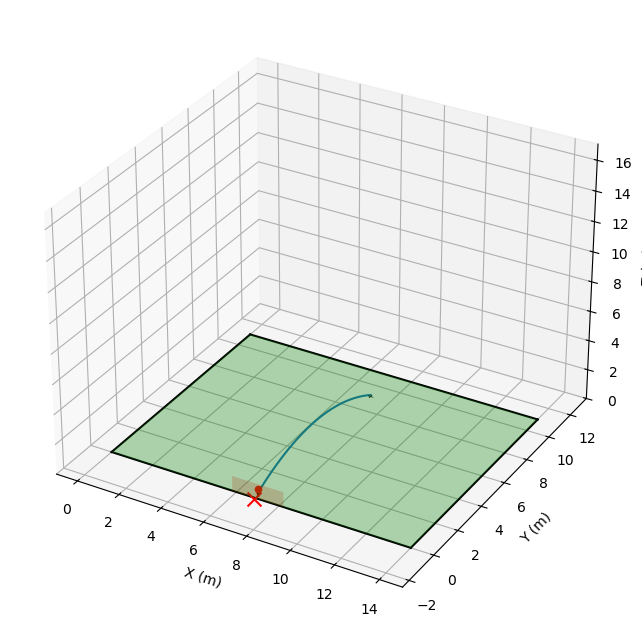

In [52]:
plot_trajectories_df_init(traj_4, trajectory_gen_goes_in)

In [ ]:
# Get max value for R_cam
import pandas as pd
accumulation_times = 5
csv_file = f"dataset_python_sim\\positions_{accumulation_time}ms.csv"
df = pd.read_csv(csv_file)
rcam_max = df['R_cam']



In [9]:
df['y_cam'] = 720 - df['y_cam']
print(df['y_cam'].max())
print(df['y_cam'].min())

1854.0
1.0


In [13]:
dataset_folder = "dataset_python_sim"
# Get all csvs on folder
height = 720
csv_files = glob.glob(os.path.join(dataset_folder, "positions*.csv"))
for csv_file in csv_files:
    # Read the csv file
    df = pd.read_csv(csv_file)
    df['y_cam'] = height - df['y_cam']
    df.to_csv(csv_file, index=False)

In [14]:
import glob
import os
dataset_folder = "dataset_python_sim"
# Get all csvs on folder
csv_files = glob.glob(os.path.join(dataset_folder, "positions*.csv"))
for csv_file in csv_files:
    # Read the csv file
    df = pd.read_csv(csv_file)
    # Get the max value of y_cam
    y_cam_max = df['y_cam'].max()
    # Get the min value of y_cam
    y_cam_min = df['y_cam'].min()
    print(f"Max y_cam: {y_cam_max}, Min y_cam: {y_cam_min}")

Max y_cam: 1854.0879657113976, Min y_cam: 1.0
Max y_cam: 1854.0, Min y_cam: 1.0
Max y_cam: 1854.0879657113976, Min y_cam: 1.0
Max y_cam: 1854.0879657113976, Min y_cam: 1.0
Max y_cam: 1854.0, Min y_cam: 1.0


In [ ]:
df.to_csv

In [7]:
df[df['y_cam']<0]

tr  frame         x         y         z  R_cam  x_cam  y_cam
109      0    109  7.173635  3.932898  1.386289     47  723.0   -3.0
110      0    110  7.168093  3.891507  1.384440     48  721.0   -6.0
111      0    111  7.162550  3.850117  1.382345     48  720.0   -9.0
112      0    112  7.157008  3.808727  1.380003     49  718.0  -12.0
113      0    113  7.151465  3.767336  1.377414     49  717.0  -15.0
...    ...    ...       ...       ...       ...    ...    ...    ...
42685  335    140  7.339316  3.155701  1.214350     60  839.0   -2.0
42686  335    141  7.338204  3.113956  1.204860     60  842.0   -2.0
42687  335    142  7.337093  3.072211  1.195123     61  844.0   -2.0
42688  335    143  7.335981  3.030466  1.185139     62  847.0   -1.0
42689  335    144  7.334869  2.988721  1.174909     63  849.0   -1.0

[1514 rows x 8 columns]

In [3]:
df = pd.read_csv('dataset_python_sim/positions_10ms.csv')

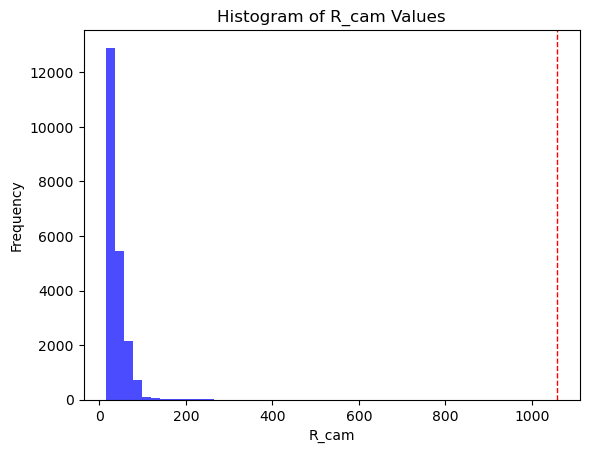

In [7]:
# Plot histogram of R_cam values
import matplotlib.pyplot as plt
plt.hist(df['R_cam'], bins=50, color='blue', alpha=0.7)
plt.xlabel('R_cam')
plt.ylabel('Frequency')
plt.title('Histogram of R_cam Values')
plt.axvline(x=df["R_cam"].max(), color='red', linestyle='dashed', linewidth=1, label=f'Max R_cam: {df["R_cam"].max()}')

# Get Positions in FOV

In [80]:
df_positions = pd.read_csv("dataset_python_sim2\\positions_10ms.csv")
df_positions


tr  frame         x         y         z  R_cam   x_cam  y_cam
0        0      0  9.050505  6.444444  0.110000     28  1171.0  474.0
1        0      1  9.033832  6.410156  0.135741     28  1169.0  468.0
2        0      2  9.017158  6.375867  0.161234     28  1168.0  462.0
3        0      3  9.000485  6.341578  0.186480     29  1166.0  456.0
4        0      4  8.983811  6.307290  0.211478     29  1165.0  450.0
...    ...    ...       ...       ...       ...    ...     ...    ...
25290  149    817  7.779100  2.294129  0.110000     83  1261.0  695.0
25291  149    818  7.781409  2.286474  0.110000     84  1265.0  696.0
25292  149    819  7.783716  2.278821  0.110000     84  1269.0  697.0
25293  149    820  7.786023  2.271170  0.110000     84  1273.0  699.0
25294  149    821  7.788329  2.263522  0.110000     85  1277.0  700.0

[25295 rows x 8 columns]

In [4]:
height = 720
width = 1280

In [81]:
df_positions['in_fov'] = (
    df_positions['x_cam'].notna()
    & (df_positions['x_cam'] > 0)
    & (df_positions['x_cam'] < width)
    & (df_positions['y_cam'] > 0)
    & (df_positions['y_cam'] < height)
)
# Create an empty list to collect indices to drop
indices_to_drop = []

trs = df_positions[~df_positions['in_fov']]['tr'].unique()
print(trs)

for tr in trs:
    df_tr = df_positions[df_positions['tr'] == tr]
    # Find the first index where in_fov is False
    first_out_idx = df_tr[df_tr['in_fov'] == False].index[0]
    # Append all indices from that index onward
    indices_to_drop.extend(df_tr.loc[first_out_idx:].index)

# Now drop all these indices at once
df_positions = df_positions.drop(indices_to_drop)

# Reset index and cleanup
df_positions = df_positions.reset_index(drop=True)
df_positions.drop(columns=['in_fov'], inplace=True)

df_positions.to_csv("dataset_python_sim2\\positions_in_fov_10ms.csv", index=False)


[59 64 86]


In [74]:
df_positions['in_fov'] = (
    df_positions['x_cam'].notna()
    & (df_positions['x_cam'] > 0)
    & (df_positions['x_cam'] < width)
    & (df_positions['y_cam'] > 0)
    & (df_positions['y_cam'] < height)
)
trs = df_positions[~df_positions['in_fov']]['tr'].unique()
trs

array([], dtype=int64)

## Invert the y labels

In [5]:
df_positions = pd.read_csv("dataset_python_sim2\\positions.csv")
df_positions['y_cam'] = height - df_positions['y_cam']
df_positions.to_csv("dataset_python_sim2\\positions.csv", index=False)